# Exploring processed FNA data and the NLTK library

Sept 25th 2019

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from src.data.make_fna import *
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

['rosaceae', 'family', 'Jussieu', 'unknown', 'amygdaloideae', 'subfamily', 'Arnott', 'unknown', 'gillenieae', 'tribe', 'Maximowicz', '1879', 'crataegus', 'genus', 'Linnaeus', '1754', 'Douglasia', 'section', 'Loudon', 'unknown', 'Purpureofructus', 'series', 'unknown', 'unknown', 'cupressocollina', 'species', 'J', '.', 'B.', 'Phipps', '&', 'O', '’', 'Kennon', '2007', 'J.', 'Bot', '.', 'Res', '.', 'Inst', '.', 'Texas', '1', ':', '1056', ',', 'plates', '6.2a', ',', '7a', ',', 'b', ',', 'fig', '.', '6', '.', '2007', 'family', 'rosaceae', ';', 'subfamily', 'amygdaloideae', ';', 'tribe', 'gillenieae', ';', 'genus', 'crataegus', ';', 'section', 'douglasia', ';', 'series', 'purpureofructus', ';', 'species', 'cupressocollina', ';', 'E', 'special_status', 'F', 'special_status', '250100083', 'fna_id', 'ACCEPTED']
<FreqDist with 55 samples and 87 outcomes>


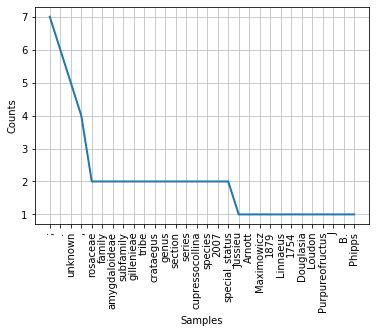

In [17]:
fna = make_fna_data_frame(fna_filepath="../data/external/fna_keys.csv")

tokenized_word=word_tokenize(fna.text.iloc[0])
print(tokenized_word)


fdist = FreqDist(tokenized_word)
print(fdist)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

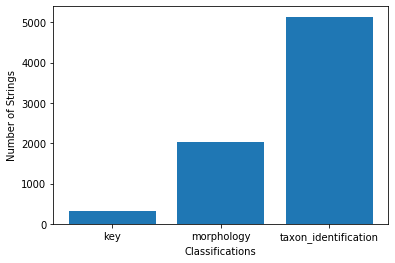

In [18]:
classification_count=fna.groupby('classification').count()
plt.bar(classification_count.index.values, classification_count['text'])
plt.xlabel('Classifications')
plt.ylabel('Number of Strings')
plt.show()


Sept 26th

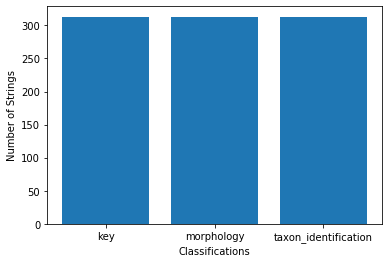

In [19]:
fna = make_fna_data_frame(fna_filepath="../data/external/fna_keys.csv", balance_categories=True)
classification_count=fna.groupby('classification').count()
plt.bar(classification_count.index.values, classification_count['text'])
plt.xlabel('Classifications')
plt.ylabel('Number of Strings')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(fna['text'])
print(text_counts)
print(fna.shape)

  (0, 11)	6
  (0, 3792)	3
  (0, 1345)	2
  (0, 5320)	2
  (0, 4931)	3
  (0, 2444)	4
  (0, 3802)	3
  (0, 6712)	2
  (0, 5904)	1
  (0, 2637)	2
  (0, 3869)	2
  (0, 2458)	1
  (0, 3481)	2
  (0, 6126)	3
  (0, 3730)	2
  (0, 1795)	6
  (0, 3781)	2
  (0, 572)	1
  (0, 656)	2
  (0, 5417)	2
  (0, 3304)	1
  (0, 5139)	2
  (0, 3820)	1
  (0, 4090)	2
  (0, 3932)	2
  :	:
  (937, 143)	1
  (937, 2909)	1
  (937, 3431)	1
  (937, 865)	1
  (937, 3641)	1
  (937, 1380)	1
  (937, 6495)	1
  (937, 3026)	1
  (937, 4959)	1
  (937, 3367)	1
  (937, 221)	2
  (937, 3911)	2
  (937, 4123)	2
  (937, 6511)	2
  (937, 798)	1
  (937, 594)	1
  (938, 5947)	2
  (938, 5538)	2
  (938, 6748)	2
  (938, 6684)	5
  (938, 3035)	2
  (938, 1711)	1
  (938, 6341)	1
  (938, 1757)	2
  (938, 1400)	2
(939, 3)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, fna['classification'], test_size=0.3, random_state=1)

In [21]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9787234042553191


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(fna['text'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, fna['classification'], test_size=0.3, random_state=123)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7978723404255319


Explore FNA data further to find candidates for stop words



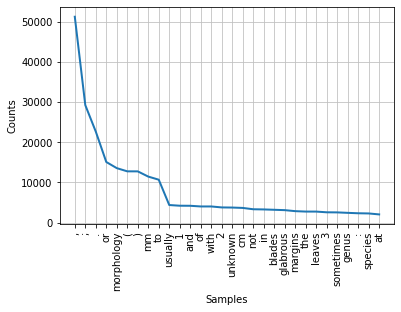

In [45]:
for treatment in fna.text:
    tokenized_word+=word_tokenize(treatment)

fdist = FreqDist(tokenized_word)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()